### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [403]:
### Data Collection
import pandas_datareader as pdr
key=""

In [404]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [283]:
df.to_csv('AAPL.csv')

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./data/ONGC.csv')

In [3]:
df.head()

,Date,Prev Close,Open,High,Low,Close,Volume
0,1/3/2000,207.70,205.0,214.4,205.0,213.45,9600
1,1/4/2000,213.45,201.5,209.7,201.0,206.55,17900
2,1/5/2000,206.55,201.0,223.1,200.5,223.10,27000
3,1/6/2000,223.10,234.0,234.9,217.6,219.30,35600
4,1/7/2000,219.30,223.0,223.0,213.0,215.75,11400


In [4]:
df.tail()

,Date,Prev Close,Open,High,Low,Close,Volume
5301,4/26/2021,102.40,105.25,105.7,102.50,102.80,11797791
5302,4/27/2021,102.80,102.80,104.0,102.80,103.20,8886250
5303,4/28/2021,103.20,103.75,104.4,103.30,103.90,6887787
5304,4/29/2021,103.90,104.90,105.9,103.55,104.05,14990087
5305,4/30/2021,104.05,104.15,112.7,103.30,108.15,81358264


In [8]:
df1=df.reset_index()['Close']

In [9]:
df1

0       213.45
1       206.55
2       223.10
3       219.30
4       215.75
         ...  
5301    102.80
5302    103.20
5303    103.90
5304    104.05
5305    108.15
Name: Close, Length: 5306, dtype: float64

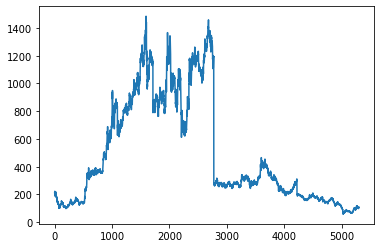

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0       213.45
1       206.55
2       223.10
3       219.30
4       215.75
         ...  
5301    102.80
5302    103.20
5303    103.90
5304    104.05
5305    108.15
Name: Close, Length: 5306, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.1077447 ]
 [0.10289987]
 [0.11452043]
 ...
 [0.03082432]
 [0.03092964]
 [0.03380845]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(3448, 1858)

In [18]:
train_data

array([[0.1077447 ],
       [0.10289987],
       [0.11452043],
       ...,
       [0.15696531],
       [0.15815897],
       [0.15872069]])

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(3347, 100)
(3347,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(1757, 100)
(1757,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
53/53 [==============================] - 49s 548ms/step - loss: 0.0296 - val_loss: 1.8726e-04
Epoch 2/100
53/53 [==============================] - 23s 439ms/step - loss: 0.0026 - val_loss: 1.3318e-04
Epoch 3/100
53/53 [==============================] - 24s 448ms/step - loss: 0.0024 - val_loss: 1.0348e-04
Epoch 4/100
53/53 [==============================] - 23s 443ms/step - loss: 0.0020 - val_loss: 1.0493e-04
Epoch 5/100
53/53 [==============================] - 22s 418ms/step - loss: 0.0019 - val_loss: 8.5669e-05
Epoch 6/100
53/53 [==============================] - 23s 443ms/step - loss: 0.0017 - val_loss: 7.2495e-05
Epoch 7/100
53/53 [==============================] - 24s 448ms/step - loss: 0.0015 - val_loss: 8.3368e-05
Epoch 8/100
53/53 [==============================] - 23s 441ms/step - loss: 0.0014 - val_loss: 6.5811e-05
Epoch 9/100
53/53 [==============================] - 24s 449ms/step - loss: 0.0014 - val_loss: 6.3746e-05
Epoch 10/100
53/53 [==========================

53/53 [==============================] - 24s 458ms/step - loss: 3.3914e-04 - val_loss: 2.3759e-05
Epoch 76/100
53/53 [==============================] - 24s 457ms/step - loss: 3.4659e-04 - val_loss: 2.3635e-05
Epoch 77/100
53/53 [==============================] - 24s 461ms/step - loss: 3.3438e-04 - val_loss: 2.6807e-05
Epoch 78/100
53/53 [==============================] - 24s 461ms/step - loss: 3.4873e-04 - val_loss: 4.3118e-05
Epoch 79/100
53/53 [==============================] - 25s 471ms/step - loss: 3.9190e-04 - val_loss: 2.3839e-05
Epoch 80/100
53/53 [==============================] - 24s 452ms/step - loss: 3.1892e-04 - val_loss: 2.7796e-05
Epoch 81/100
53/53 [==============================] - 24s 460ms/step - loss: 3.3283e-04 - val_loss: 2.4424e-05
Epoch 82/100
53/53 [==============================] - 25s 464ms/step - loss: 3.3964e-04 - val_loss: 2.5117e-05
Epoch 83/100
53/53 [==============================] - 24s 455ms/step - loss: 3.5805e-04 - val_loss: 3.7642e-05
Epoch 84/100
5

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.11.0'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

55/55 [==============================] - 2s 36ms/step


In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

757.7120464803228

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

223.6487285399601

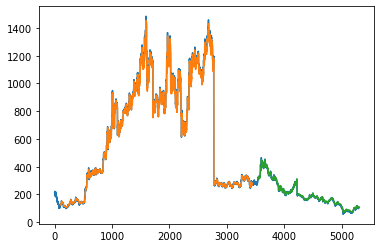

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

1858

In [41]:
x_input=test_data[1758:].reshape(1,-1)
x_input.shape


(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
temp_input

[0.0201516640921219,
 0.020959134952956038,
 0.022152787529841317,
 0.021591068670130595,
 0.02190703552871788,
 0.022223002387305166,
 0.02583906754669288,
 0.029139165847493334,
 0.028401909844123024,
 0.03012217385198708,
 0.029139165847493334,
 0.027383794410897347,
 0.020959134952956038,
 0.021450638955202925,
 0.021626176098862512,
 0.023276225249262747,
 0.023732621822777702,
 0.023276225249262747,
 0.023346440106726582,
 0.023206010391798898,
 0.023311332677994664,
 0.025944389832888645,
 0.02454009268361186,
 0.025944389832888645,
 0.02661143097879512,
 0.028542339559050695,
 0.029876421850863644,
 0.0305083555680382,
 0.0317722230023873,
 0.03163179328745963,
 0.0290689509900295,
 0.025733745260497126,
 0.02675186069372279,
 0.02727847212470158,
 0.02436455553995226,
 0.022995365819407393,
 0.022012357814913633,
 0.020853812666760285,
 0.02152085381266676,
 0.019870804662266532,
 0.02166128352759443,
 0.023065580676871228,
 0.023416654964190417,
 0.02643589383513552,
 0.02643

In [44]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.03466703]
101
1 day input [0.02095913 0.02215279 0.02159107 0.02190704 0.022223   0.02583907
 0.02913917 0.02840191 0.03012217 0.02913917 0.02738379 0.02095913
 0.02145064 0.02162618 0.02327623 0.02373262 0.02327623 0.02334644
 0.02320601 0.02331133 0.02594439 0.02454009 0.02594439 0.02661143
 0.02854234 0.02987642 0.03050836 0.03177222 0.03163179 0.02906895
 0.02573375 0.02675186 0.02727847 0.02436456 0.02299537 0.02201236
 0.02085381 0.02152085 0.0198708  0.02166128 0.02306558 0.02341665
 0.02643589 0.02643589 0.02784019 0.02878809 0.02808594 0.02769976
 0.0259795  0.02699761 0.030719   0.02966578 0.03559893 0.0316669
 0.03250948 0.03665216 0.03763516 0.04146187 0.03580958 0.04005758
 0.03756495 0.03791602 0.03700323 0.03858306 0.04090015 0.03984693
 0.03819688 0.03865328 0.03816178 0.03868839 0.03465103 0.03524786
 0.0354585  0.03482657 0.03310631 0.03145626 0.02949024 0.0297711
 0.03054346 0.02959556 0.03114029 0.03050836 0.03085943 0.03135093
 0.03061368 0.03075411 0.02671675 0

10 day output [[0.04491242]]
11 day input [0.02738379 0.02095913 0.02145064 0.02162618 0.02327623 0.02373262
 0.02327623 0.02334644 0.02320601 0.02331133 0.02594439 0.02454009
 0.02594439 0.02661143 0.02854234 0.02987642 0.03050836 0.03177222
 0.03163179 0.02906895 0.02573375 0.02675186 0.02727847 0.02436456
 0.02299537 0.02201236 0.02085381 0.02152085 0.0198708  0.02166128
 0.02306558 0.02341665 0.02643589 0.02643589 0.02784019 0.02878809
 0.02808594 0.02769976 0.0259795  0.02699761 0.030719   0.02966578
 0.03559893 0.0316669  0.03250948 0.03665216 0.03763516 0.04146187
 0.03580958 0.04005758 0.03756495 0.03791602 0.03700323 0.03858306
 0.04090015 0.03984693 0.03819688 0.03865328 0.03816178 0.03868839
 0.03465103 0.03524786 0.0354585  0.03482657 0.03310631 0.03145626
 0.02949024 0.0297711  0.03054346 0.02959556 0.03114029 0.03050836
 0.03085943 0.03135093 0.03061368 0.03075411 0.02671675 0.02952535
 0.0316669  0.03321163 0.0302275  0.03008707 0.0302626  0.0297711
 0.03005196 0.0303328

21 day output [[0.05373102]]
22 day input [0.02454009 0.02594439 0.02661143 0.02854234 0.02987642 0.03050836
 0.03177222 0.03163179 0.02906895 0.02573375 0.02675186 0.02727847
 0.02436456 0.02299537 0.02201236 0.02085381 0.02152085 0.0198708
 0.02166128 0.02306558 0.02341665 0.02643589 0.02643589 0.02784019
 0.02878809 0.02808594 0.02769976 0.0259795  0.02699761 0.030719
 0.02966578 0.03559893 0.0316669  0.03250948 0.03665216 0.03763516
 0.04146187 0.03580958 0.04005758 0.03756495 0.03791602 0.03700323
 0.03858306 0.04090015 0.03984693 0.03819688 0.03865328 0.03816178
 0.03868839 0.03465103 0.03524786 0.0354585  0.03482657 0.03310631
 0.03145626 0.02949024 0.0297711  0.03054346 0.02959556 0.03114029
 0.03050836 0.03085943 0.03135093 0.03061368 0.03075411 0.02671675
 0.02952535 0.0316669  0.03321163 0.0302275  0.03008707 0.0302626
 0.0297711  0.03005196 0.03033282 0.03082432 0.03092964 0.03380845
 0.03466703 0.03566422 0.03676155 0.03787147 0.03896307 0.04002723
 0.04106176 0.0420666  0

29 day output [[0.059159]]
[[0.03466702625155449], [0.03566421568393707], [0.03676155209541321], [0.03787147253751755], [0.03896307200193405], [0.040027227252721786], [0.04106175899505615], [0.042066603899002075], [0.043042510747909546], [0.043990641832351685], [0.044912420213222504], [0.04580938071012497], [0.046683117747306824], [0.04753519594669342], [0.048367105424404144], [0.04918024316430092], [0.0499759204685688], [0.05075531080365181], [0.05151956155896187], [0.05226965621113777], [0.053006548434495926], [0.05373101681470871], [0.05444389209151268], [0.05514584854245186], [0.05583749711513519], [0.05651940405368805], [0.05719209462404251], [0.0578560046851635], [0.05851152166724205], [0.05915900319814682]]


In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
import matplotlib.pyplot as plt

In [47]:
len(df1)

5306

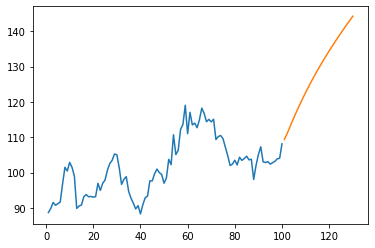

In [53]:
plt.plot(day_new,scaler.inverse_transform(df1[5206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

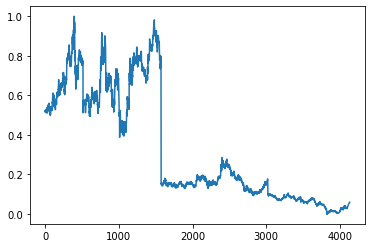

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

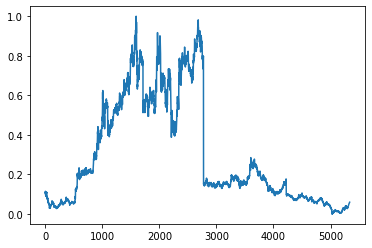

In [51]:
plt.plot(df3)